# Summary for FastAi practical coding

## Lesson 2 (introduction to dataloaders)

In [2]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

### Dataloaders

Datablock - Defines
1. blocks (type of data item)
2. where the data is contained
3. data labelling (get y, get x or get image)
4. validation set
    

In [5]:
# Example

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
# All Datablocks need to specify where images / data is located to make a dataloaders
dls = bears.dataloaders(path)


1. Data, get_y, block type, splitter
2. item transforms 
3. --> datablock.dataloaders(image location) --> dataloaders
4. dataloaders.learn()

From a Datablock with relevant information, now have a Dataloaders

### Item transforms and aug transforms

Item transforms - run on each item such as Resize

Resize - makes the tensors the same size, can pad with squish (stretches) and zeros (black bars)

Standard approach = RandomResizeCrop (set size, min_scale = how much to zoom)


In [8]:
# bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
# dls = bears.dataloaders(path)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)


Data Augmentation is 'pseudo-labelling'
Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes

### batch_tfms = 

In [ ]:
# bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = bears.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Full basic dataloaders flow

In [9]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

## Lesson 4 (MNIST Basics)

### Mostly regarding data cleaning

In [ ]:
# Opening images
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()
(path/'train').ls()
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes


In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3


In [ ]:
# Images are stored as tensors 0-255 grey scale
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


### Pixel similarity test

In [ ]:
# Create tensors of images

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)


In [ ]:
show_image(three_tensors[1]);


torch.stack to create three dimensional tensor 

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

len(stacked_threes.shape)
stacked_threes.ndim
#Three dimensiona;

In [ ]:
mean3 = stacked_threes.mean(0)
# Stacked on the 0 axis

Mean absolute difference = L1 norm
Mean squared error = L2 norm

Broadcasting - effectively 'expands' tensors so they can participate in mathematical operations

In [15]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [16]:
float(1.0)

1.0

In [21]:
bool(float(1.0)), bool(float(0.0)), bool(float(0.5))

(True, False, True)

## SGD / Principles / Basic optimisation


In [ ]:
# Fundamentals of SGD

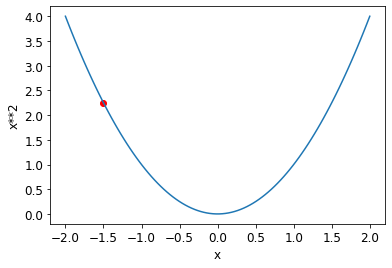

In [24]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

# gradient is negative -> to approach local min pick -(gradient) as direction

In [ ]:
# Point where want gradient
# equivalent output f(xt)
# call backward() on this f(xt) [ the y point ]
# 'remembers' the gradient at xt

In [25]:
xt = tensor(3.).requires_grad_()

In [27]:
yt = f(xt)
yt
yt.backward()


In [28]:
xt.grad


tensor(6.)

In [29]:
w -= gradient(w) * lr


NameError: name 'w' is not defined

In [30]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c


In [37]:
p_container = 2,5,3
# This is a tuple

In [ ]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds


1. predicted speed - f(time, params), params is a random tuple
(params = torch.randn(3).requires_grad_())
2. loss = difference between guess and target (mse)
3. calculate gradient at loss
4. -> updates params
5. 